In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded dataset
file_path = r"E:\student_depression_dataset\clean_student_depression_dataset.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows and column names to understand the structure
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Academic Pressure label,Work Pressure,Work Pressure2,CGPA,...,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Work/Study Hours2,Financial Stress,Financial Stress2,Family History of Mental Illness,Depression,Depression label
0,2,Male,33,Visakhapatnam,Student,5,Strongly Agree,1,Strongly Disagree,8.97,...,Healthy,B.Pharm,Yes,3,Neutral,1,Strongly Disagree,No,1,YES
1,8,Female,24,Bangalore,Student,2,Disagree,1,Strongly Disagree,5.90,...,Moderate,BSc,No,3,Neutral,2,Disagree,Yes,0,NO
2,26,Male,31,Srinagar,Student,3,Neutral,1,Strongly Disagree,7.03,...,Healthy,BA,No,9,Strongly Disagree,1,Strongly Disagree,Yes,0,NO
3,30,Female,28,Varanasi,Student,3,Neutral,1,Strongly Disagree,5.59,...,Moderate,BCA,Yes,4,Agree,5,Strongly Agree,Yes,1,YES
4,32,Female,25,Jaipur,Student,4,Agree,1,Strongly Disagree,8.13,...,Moderate,M.Tech,Yes,1,Strongly Disagree,1,Strongly Disagree,No,0,NO


In [2]:
print(df["City"].unique())


['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Khaziabad']


In [3]:
df["City"] = df["City"].replace("Khaziabad", "Ghaziabad")
print(df["City"].unique())

['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi']


In [4]:
#Basic Info
print("Shape:", df.shape)

print("\nInfo:\n")
print(df.info())

Shape: (27901, 25)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Academic Pressure label                27901 non-null  object 
 7   Work Pressure                          27901 non-null  int64  
 8   Work Pressure2                         27901 non-null  object 
 9   CGPA                                   27901 non-null  float64
 10  Study Satisfaction                     2790

In [5]:
# Check for duplicates
duplicates = df.duplicated()
print("\nDuplicate rows (True indicates a duplicate):")
display(duplicates)


Duplicate rows (True indicates a duplicate):


0        False
1        False
2        False
3        False
4        False
         ...  
27896    False
27897    False
27898    False
27899    False
27900    False
Length: 27901, dtype: bool

In [6]:
df["Depression label"].value_counts()


Depression label
YES    16336
NO     11565
Name: count, dtype: int64

In [7]:
# Descriptive Statistics
df.describe(include='number')


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,1.000323,7.656104,2.944196,1.000681,7.156984,3.139744,0.585499
std,40641.175216,4.905687,1.381465,0.034390,1.470707,1.360504,0.044394,3.707642,1.437318,0.492645
min,2.000000,18.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,1.000000,6.290000,2.000000,1.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,1.000000,7.770000,3.000000,1.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,1.000000,8.920000,4.000000,1.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [8]:
# Value Counts (Categorical Columns)
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print("\nPercentage:")
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 50)


Column: Gender
Gender
Male      15547
Female    12354
Name: count, dtype: int64

Percentage:
Gender
Male      55.722017
Female    44.277983
Name: proportion, dtype: float64
--------------------------------------------------

Column: City
City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1180
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         746
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

Percentage:
City
Kalyan           5.627038
Srinagar         4.917386


In [9]:
# Correlation for numeric columns
correlation = df.corr(numeric_only=True)
correlation


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
id,1.000000,0.003783,0.005172,0.001220,-0.012324,0.007817,0.001931,-0.004466,0.000799,0.000923
Age,0.003783,1.000000,-0.075803,0.002677,0.005056,0.009137,-0.000432,-0.032928,-0.095038,-0.226422
Academic Pressure,0.005172,-0.075803,1.000000,-0.021328,-0.022239,-0.111373,-0.024945,0.095970,0.151763,0.474835
Work Pressure,0.001220,0.002677,-0.021328,1.000000,-0.048830,-0.013404,0.774578,-0.004895,0.001988,-0.002686
CGPA,-0.012324,0.005056,-0.022239,-0.048830,1.000000,-0.045146,-0.053631,0.002604,0.005915,0.022210
Study Satisfaction,0.007817,0.009137,-0.111373,-0.013404,-0.045146,1.000000,-0.013613,-0.036605,-0.064985,-0.168043
Job Satisfaction,0.001931,-0.000432,-0.024945,0.774578,-0.053631,-0.013613,1.000000,-0.005222,0.005249,-0.003482
Work/Study Hours,-0.004466,-0.032928,0.095970,-0.004895,0.002604,-0.036605,-0.005222,1.000000,0.075187,0.208563
Financial Stress,0.000799,-0.095038,0.151763,0.001988,0.005915,-0.064985,0.005249,0.075187,1.000000,0.363600
Depression,0.000923,-0.226422,0.474835,-0.002686,0.022210,-0.168043,-0.003482,0.208563,0.363600,1.000000


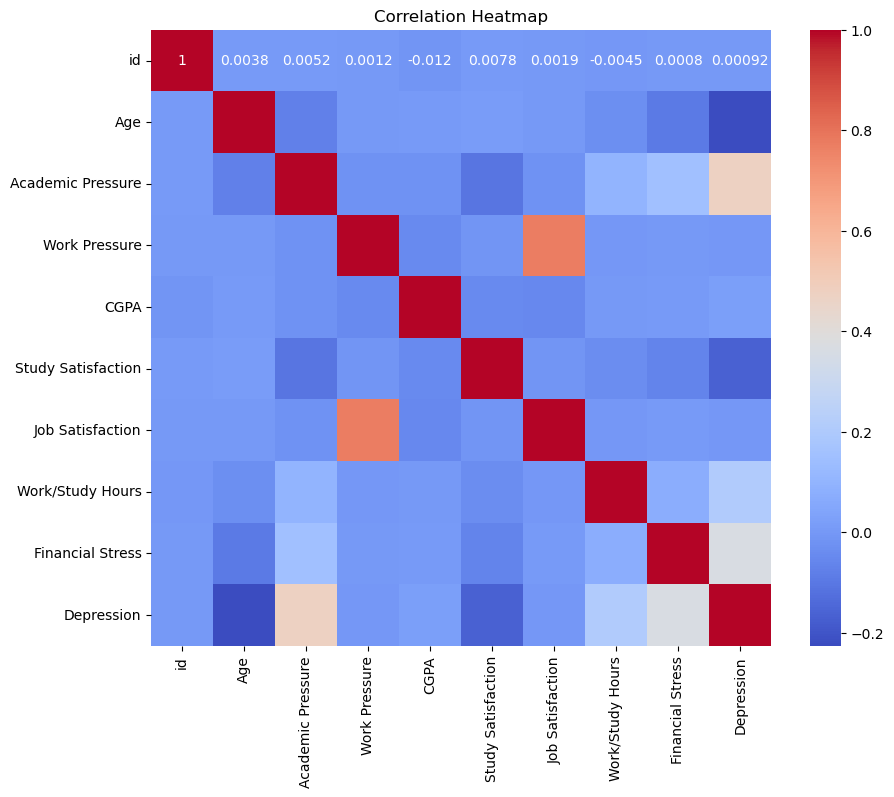

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
''' 1. Depression & Academic Pressure
   Positive correlation (≈ 0.47)
    - Students with higher academic pressure are more likely to report depression.

2. Depression & Study Satisfaction
   Negative correlation (≈ -0.16 to -0.17)
    - Students with higher satisfaction in their studies tend to show lower levels of depression.

3. Depression & Work/Study Hours
   Positive correlation (≈ 0.21)
   - Longer study/work hours are linked with higher depression.

4. Depression & CGPA
   Very weak positive correlation (≈ 0.02)
   - CGPA doesn’t show strong relation with depression in this dataset.
'''

' 1. Depression & Academic Pressure\n   Positive correlation (≈ 0.47)\n    - Students with higher academic pressure are more likely to report depression.\n\n2. Depression & Study Satisfaction\n   Negative correlation (≈ -0.16 to -0.17)\n    - Students with higher satisfaction in their studies tend to show lower levels of depression.\n\n3. Depression & Work/Study Hours\n   Positive correlation (≈ 0.21)\n   - Longer study/work hours are linked with higher depression.\n\n4. Depression & CGPA\n   Very weak positive correlation (≈ 0.02)\n   - CGPA doesn’t show strong relation with depression in this dataset.\n'

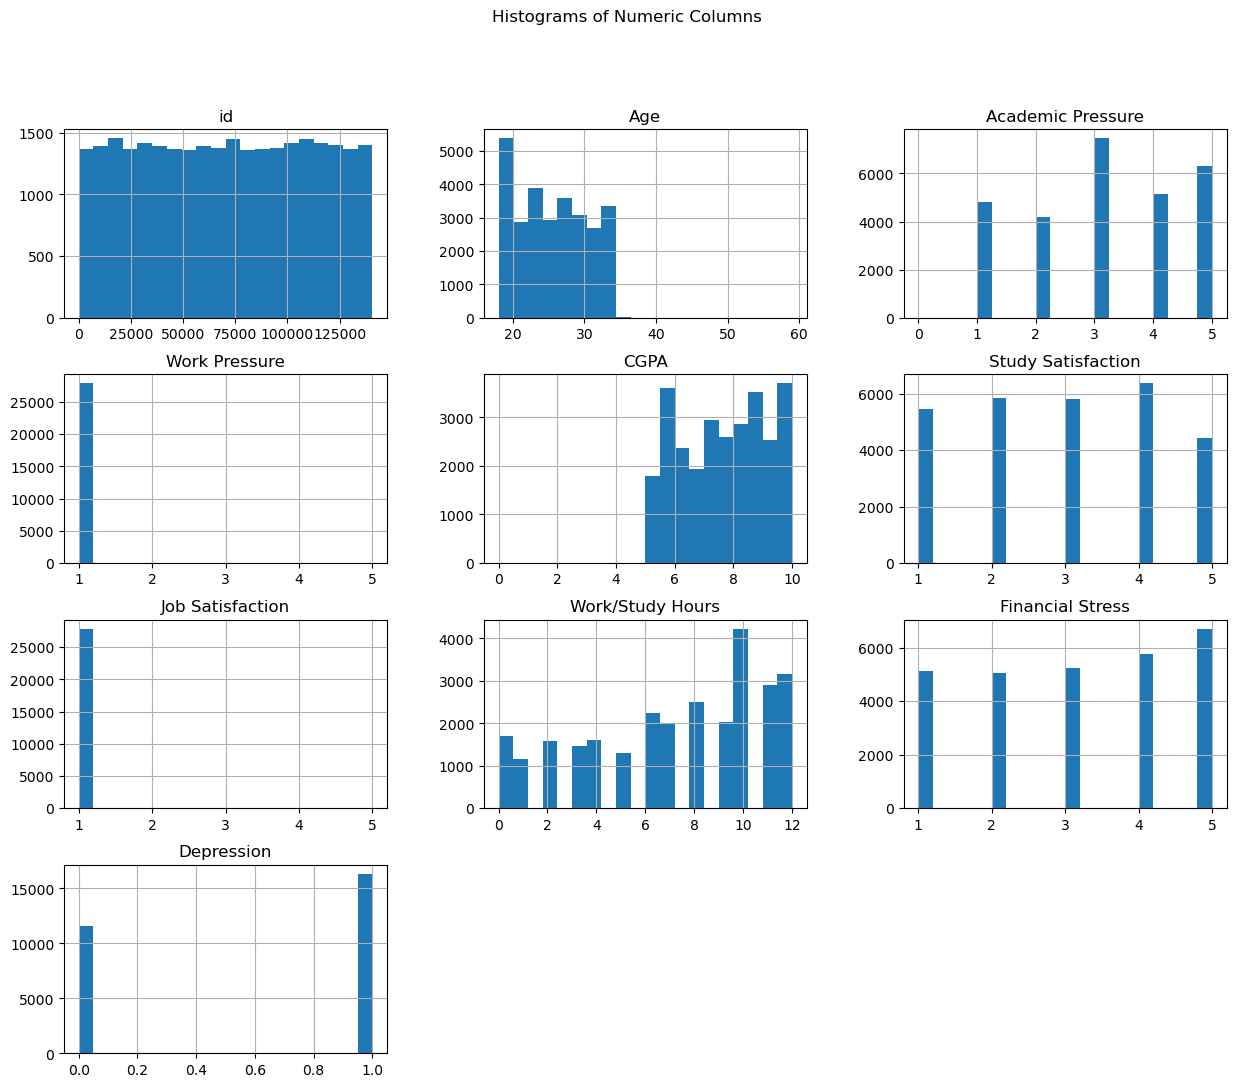

In [12]:
# Histograms (Numeric Columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(figsize=(15, 12), bins=20)
plt.suptitle("Histograms of Numeric Columns")
plt.show()


In [13]:
# Skewness & Kurtosis
for col in numeric_cols:
    print(f"{col}: Skewness={df[col].skew():.2f}, Kurtosis={df[col].kurt():.2f}")


id: Skewness=-0.01, Kurtosis=-1.21
Age: Skewness=0.13, Kurtosis=-0.85
Academic Pressure: Skewness=-0.14, Kurtosis=-1.16
Work Pressure: Skewness=113.66, Kurtosis=13140.85
CGPA: Skewness=-0.11, Kurtosis=-1.02
Study Satisfaction: Skewness=0.01, Kurtosis=-1.23
Job Satisfaction: Skewness=74.11, Kurtosis=5927.00
Work/Study Hours: Skewness=-0.45, Kurtosis=-1.00
Financial Stress: Skewness=-0.13, Kurtosis=-1.32
Depression: Skewness=-0.35, Kurtosis=-1.88


In [17]:
import pandas as pd

# Load cleaned dataset
file_path = r"E:\student_depression_dataset\clean_student_depression_dataset.xlsx"
df = pd.read_excel(file_path)

# CGPA quantiles
df["CGPA_Quantile"] = pd.qcut(df["CGPA"], q=4, labels=["Lowest 25%", "25-50%", "50-75%", "Top 25%"])

# Study/Work Hours quantiles
df["Hours_Quantile"] = pd.qcut(df["Work/Study Hours"], q=4, labels=["Lowest 25%", "25-50%", "50-75%", "Top 25%"])

# Depression counts by CGPA quantile
cgpa_counts = df.groupby("CGPA_Quantile")["Depression label"].value_counts(normalize=True).unstack().fillna(0) * 100

# Depression counts by Study Hours quantile
hours_counts = df.groupby("Hours_Quantile")["Depression label"].value_counts(normalize=True).unstack().fillna(0) * 100

print("Depression % by CGPA Quantile:\n", cgpa_counts)
print("\nDepression % by Study Hours Quantile:\n", hours_counts)


Depression % by CGPA Quantile:
 Depression label         NO        YES
CGPA_Quantile                         
Lowest 25%        43.188612  56.811388
25-50%            43.273192  56.726808
50-75%            37.307581  62.692419
Top 25%           41.950798  58.049202

Depression % by Study Hours Quantile:
 Depression label         NO        YES
Hours_Quantile                        
Lowest 25%        56.459330  43.540670
25-50%            41.164783  58.835217
50-75%            33.019169  66.980831
Top 25%           31.909631  68.090369


C:\Users\DELL\AppData\Local\Temp\ipykernel_14564\2731847759.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cgpa_counts = df.groupby("CGPA_Quantile")["Depression label"].value_counts(normalize=True).unstack().fillna(0) * 100
C:\Users\DELL\AppData\Local\Temp\ipykernel_14564\2731847759.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_counts = df.groupby("Hours_Quantile")["Depression label"].value_counts(normalize=True).unstack().fillna(0) * 100


In [14]:
import statsmodels.api as sm

X = df[['Academic Pressure','Financial Stress','Work/Study Hours','Age','CGPA','Study Satisfaction']]
X = sm.add_constant(X)
y = df['Depression']   # numeric 0/1
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.457489
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                27901
Model:                          Logit   Df Residuals:                    27894
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Sep 2025   Pseudo R-squ.:                  0.3257
Time:                        19:28:13   Log-Likelihood:                -12764.
converged:                       True   LL-Null:                       -18930.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7514      0.137    -12.816      0.000      -2.019      -1.484
Acade

In [15]:
''' Academic pressure is the strongest predictor: students under more pressure are over twice as likely to report depression.

Financial stress also has a strong effect (students with more financial stress are ~1.8× more likely to be depressed).
Longer study/work hours increase depression risk modestly (≈13% per extra hour).
Younger students are more likely to be depressed; each extra year of age reduces the odds by ~10%.
Study satisfaction is protective: satisfied students have a ~21% lower risk of depression per unit increase.
CGPA has a small effect — grades themselves don’t strongly predict depression compared to pressure, stress, and satisfaction.'''

' Academic pressure is the strongest predictor: students under more pressure are over twice as likely to report depression.\n\nFinancial stress also has a strong effect (students with more financial stress are ~1.8× more likely to be depressed).\nLonger study/work hours increase depression risk modestly (≈13% per extra hour).\nYounger students are more likely to be depressed; each extra year of age reduces the odds by ~10%.\nStudy satisfaction is protective: satisfied students have a ~21% lower risk of depression per unit increase.\nCGPA has a small effect — grades themselves don’t strongly predict depression compared to pressure, stress, and satisfaction.'

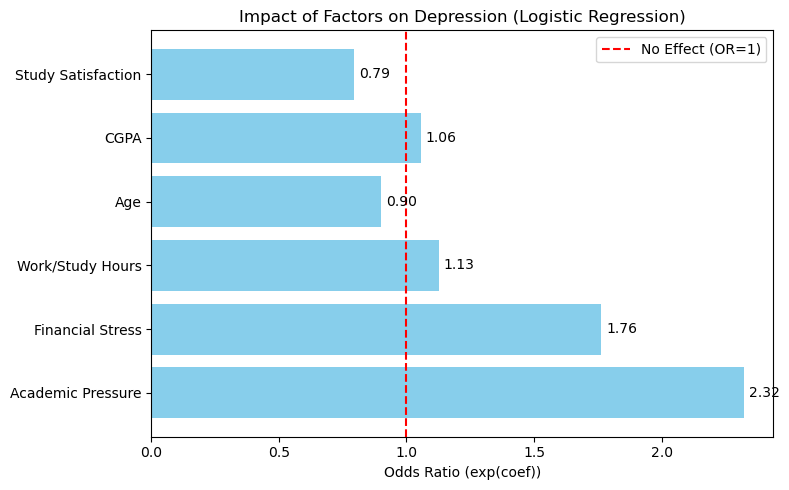

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic regression coefficients
variables = [
    "Academic Pressure",
    "Financial Stress",
    "Work/Study Hours",
    "Age",
    "CGPA",
    "Study Satisfaction"
]
coefficients = [0.8424, 0.5670, 0.1188, -0.1058, 0.0546, -0.2307]

# Convert coefficients to Odds Ratios
odds_ratios = np.exp(coefficients)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(variables, odds_ratios, color="skyblue")
plt.axvline(1, color="red", linestyle="--", label="No Effect (OR=1)")
plt.xlabel("Odds Ratio (exp(coef))")
plt.title("Impact of Factors on Depression (Logistic Regression)")
plt.legend()

# Add values on the bars
for bar, or_value in zip(bars, odds_ratios):
    plt.text(or_value + 0.02, bar.get_y() + bar.get_height()/2,
             f"{or_value:.2f}", va="center")

plt.tight_layout()
plt.show()
